In [57]:
import sys
import os

sys.path.append(os.path.abspath(".."))

import random
from graphviz import Digraph
from src.nn import MLP

In [58]:
training_cycles = 50
step = 0.05

network = MLP(3, [5, 5, 1])

inputs = [
    [-2.0, 6.0, 1.2],
    [9.0, -3.1, 3.7],
    [3.5, 2.3, 9.2]
]

outputs = [
    0.1,
    1,
    -0.34
]

In [59]:
def trace(root):
    nodes, edges = set(), set()
    param_nodes = network.parameters()
    def build(node):
        if node not in nodes:
            nodes.add(node)

            if len(node._prev) == 0 and node not in param_nodes:
                node.label = "input"

            for n in node._prev:
                edges.add((n, node))
                build(n)
    
    build(root)
    return nodes, edges

def build_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # Left to right graph

    nodes, edges = trace(root)
    for node in nodes:
        uid = str(id(node))

        dot.node(name=uid, label=f'{node.label} | data {node.data:.4f} | grad {node.grad:.4f}', shape='record')

        if node._op:
            dot.node(name=uid+node._op, label=node._op)
            dot.edge(uid+node._op, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2))+n2._op)
    
    return dot


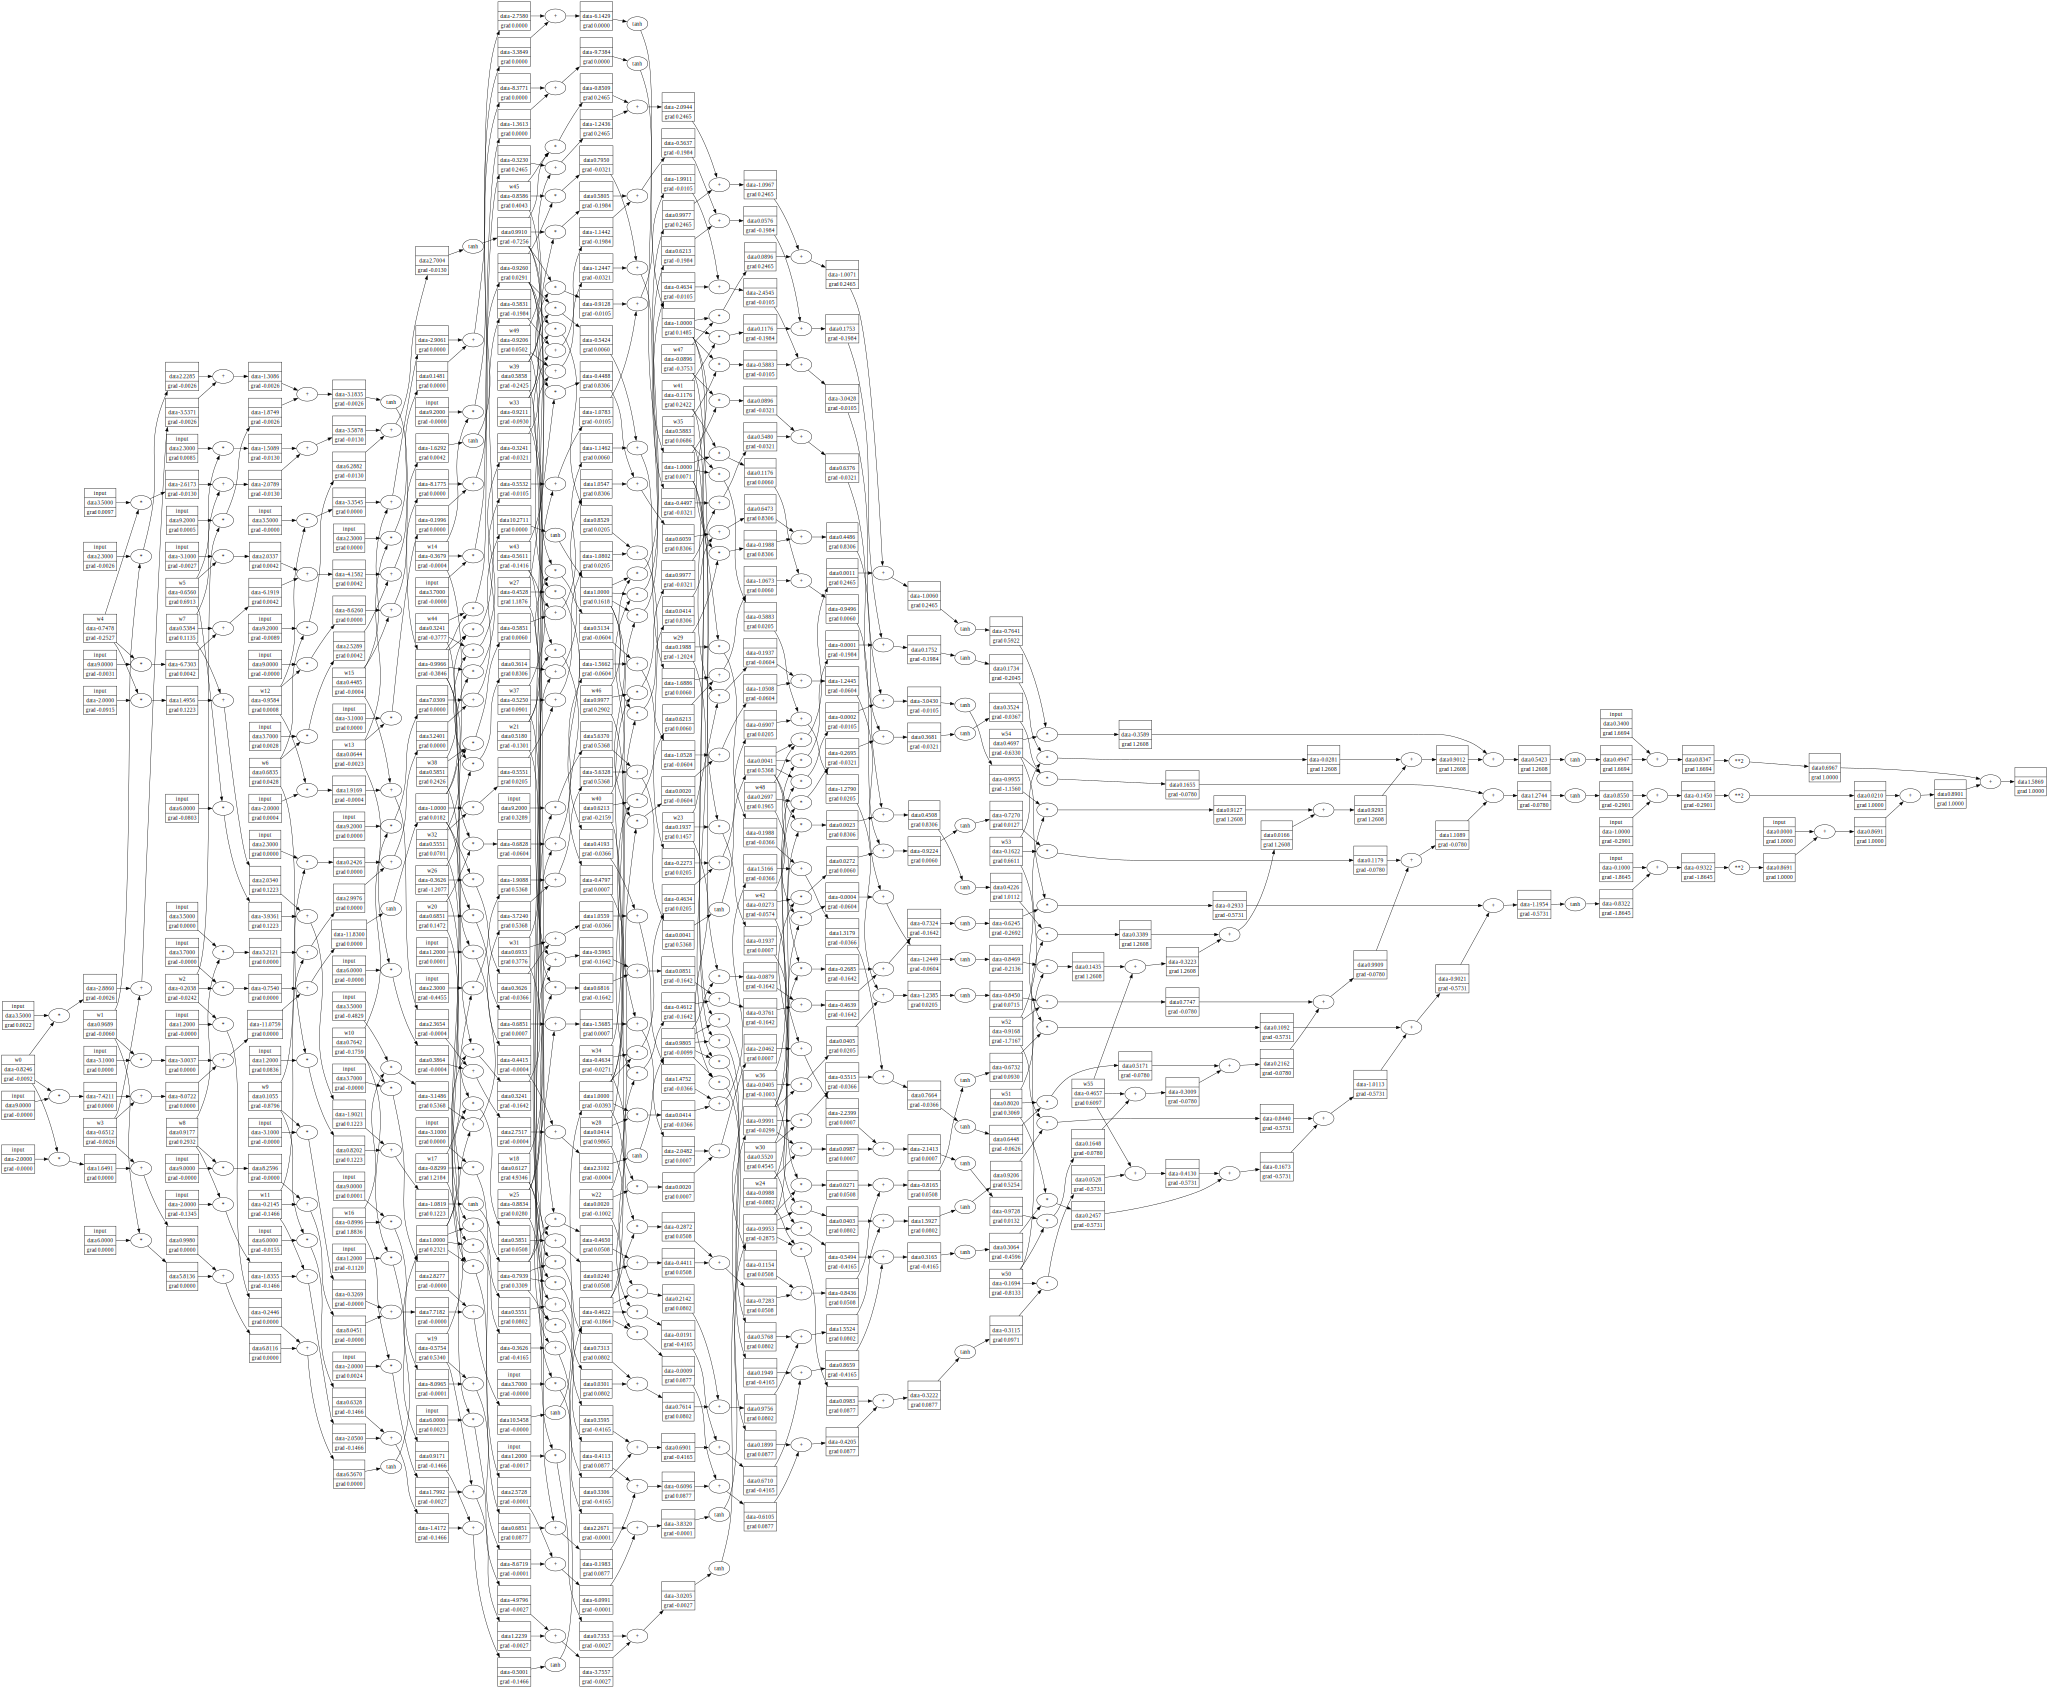

In [60]:
outs = [network(ins) for ins in inputs]
L = sum((out-exp)**2 for out, exp in zip(outs, outputs))
L.backward()

for i, p in enumerate(network.parameters()):
    p.label = f'w{i}'

build_dot(L)